In [201]:
import matplotlib.pyplot as plt
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

In [2]:
datamice= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_mice.csv")
datamedian= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_median.csv")
dataknn= pd.read_csv("C:/Users/seung/Desktop/finalproject/ESC20SPRING_team4/modeling/data/final_knn.csv")

In [5]:
stf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 730)

### Mice

In [116]:
X_train, X_test, y_train, y_test = train_test_split(datamice.iloc[:, 0:(datamice.shape[1]-1)], datamice['class'], test_size=0.3, random_state= 730)

In [78]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [7]:
logi = LogisticRegression(random_state=730)

In [10]:
logi  = logi.fit(X_train, y_train)

In [11]:
scores = cross_val_score(logi, X_train, y_train, cv=5)
np.mean(scores)

0.95434554973822

In [12]:
pred_y = logi.predict(X_test)

In [13]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.949
ROC AUC : 0.581


#### Ridge classifier CV

In [15]:
from sklearn.linear_model import RidgeClassifierCV 

In [17]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
clf.score(X_train, y_train)

0.9568586387434554

In [95]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [109]:
ridge = RidgeClassifierCV()
ridge.set_params(alphas = alphas)
ridge.fit(X_train, y_train)
ridge.alpha_

0.9726933615426179

In [112]:
pred_y = ridge.predict(X_test)
test_MSE = mean_squared_error(y_test, pred_y)
test_MSE

0.048851978505129456

In [203]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.951
ROC AUC : 0.590


In [198]:
cols = list(X_train.columns)
coefs = ridge.coef_[0,]

In [199]:
df = pd.DataFrame({"X" :cols, "coef": coefs})
df = df.sort_values(['coef'], ascending=[False])

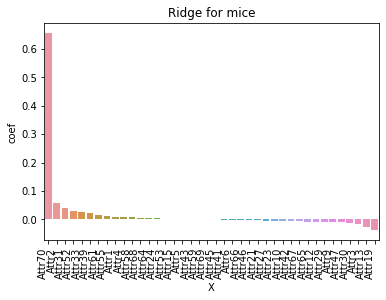

In [221]:
lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Ridge for mice")
plt.show()

### KNN

In [205]:
X_train, X_test, y_train, y_test = train_test_split(dataknn.iloc[:, 0:(dataknn.shape[1]-1)], dataknn['class'], test_size=0.3, random_state= 730)

In [206]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [207]:
alphas=np.logspace(-6, 6, 500)
ridge = RidgeClassifierCV()
ridge.set_params(alphas = alphas)
ridge.fit(X_train, y_train)
ridge.alpha_

46.918345106077986

In [208]:
pred_y = ridge.predict(X_test)
test_MSE = mean_squared_error(y_test, pred_y)
test_MSE

0.05288932419196866

In [209]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.947
ROC AUC : 0.509


In [210]:
cols = list(X_train.columns)
coefs = ridge.coef_[0,]

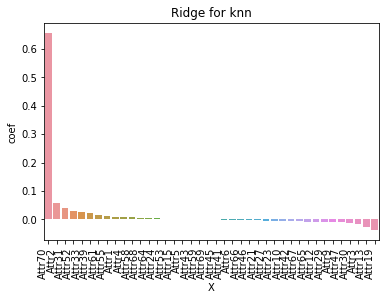

In [220]:
df = pd.DataFrame({"X" :cols, "coef": coefs})
df = df.sort_values(['coef'], ascending=[False])
lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Ridge for knn")
plt.show()

### Median

In [212]:
X_train, X_test, y_train, y_test = train_test_split(datamedian.iloc[:, 0:(datamedian.shape[1]-1)], datamedian['class'], test_size=0.3, random_state= 730)

In [213]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [214]:
alphas=np.logspace(-6, 6, 500)
ridge = RidgeClassifierCV()
ridge.set_params(alphas = alphas)
ridge.fit(X_train, y_train)
ridge.alpha_

77.22813571388642

In [215]:
pred_y = ridge.predict(X_test)
test_MSE = mean_squared_error(y_test, pred_y)
test_MSE

0.05180840664711633

In [216]:
print("F1 : %.3f" % f1_score(y_test, pred_y, average = 'micro'))
print("ROC AUC : %.3f" % roc_auc_score(y_test, pred_y))

F1 : 0.948
ROC AUC : 0.504


In [217]:
cols = list(X_train.columns)
coefs = ridge.coef_[0,]

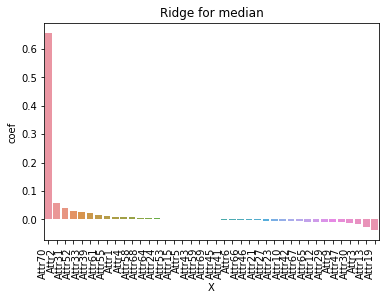

In [219]:
df = pd.DataFrame({"X" :cols, "coef": coefs})
df = df.sort_values(['coef'], ascending=[False])
lasso = sns.barplot(
    data= df,
    x = "X",
    y = "coef"
)
lasso.set_xticklabels(lasso.get_xticklabels(), rotation=90, horizontalalignment='right')
lasso.set_title("Ridge for median")
plt.show()